# Определение перспективного тарифа для телеком-компании

 ### Описание проекта
    
Телеком компания предоставляет своим клиентам 2 тарифа:

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
o	минута разговора: 3 рубля
o	сообщение: 3 рубля
o	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
o	минута разговора: 1 рубль
o	сообщение: 1 рубль
o	1 Гб интернет-трафика: 150 рублей

Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Нам предоставили ледующие данные:
Путь к файлам:

•	/datasets/calls.csv.  

•	/datasets/internet.csv.  

•	/datasets/messages.csv.

•	/datasets/tariffs.csv. 

•	/datasets/users.csv. 

Мы аналитики компании «Мегалайн» — федерального оператора сотовой связи. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Откроем предоставленные данные и изучим информацию

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
import numpy as np
import warnings

### Calls

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Таблица calls (информация о звонках):

- id — уникальный номер звонка;
- call_date — дата звонка;
- duration — длительность звонка в минутах;
- user_id — идентификатор пользователя, сделавшего звонок.

### Internet

In [3]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии;
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);
- session_date — дата интернет-сессии;
- user_id — идентификатор пользователя.

### Messages

In [4]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


### Tariffs

In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Как мы видим таблица содержит данные о тарифах и нам достаточно информации

### Users

In [6]:
users= pd.read_csv('/datasets/users.csv')
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

## Подготовка данных к анализу

### Calls

Поскольку перед нами стоит задача определить более популярный тариф, а тариф оплачивается  и предоставляется на месяц, нам нужно делать выборку по месяцам. Для этого нам нужно сгруппировать данные по месяцам. Добавим соответствующий столбец к таблице 

In [7]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Звонки округляются в большую сторону, поэтому округлим продолжительность вызова и преобразуем в целочисленный формат

In [8]:
calls['duration'] = np.ceil(calls['duration']).astype('Int64') 

In [9]:
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         202607 non-null  object
 1   call_date  202607 non-null  object
 2   duration   202607 non-null  Int64 
 3   user_id    202607 non-null  int64 
 4   month      202607 non-null  int64 
dtypes: Int64(1), int64(2), object(2)
memory usage: 7.9+ MB


,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,7.158198,1253.940619,8.574067
std,5.959173,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,2.000000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,11.000000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


Поменяем формат даты

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Для анализа достаточно будет 3 столбцов с данными

In [11]:
calls = calls[['user_id', 'month', 'duration']]

Сформируем таблицу с разбивкой по user_id, месяцам и посчитаем количество использованных в месяц минут.

In [12]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
calls_pivot = calls_pivot.rename(columns={'duration':'minut_sum'})
calls_pivot.head()

,user_id,month,minut_sum
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


В итоге у нас получилась таблица из 3 столбцов с идентификатором пользователя, месяцем и количеством использованных в месяц минутах.

### Internet

Добавим столбец с разбивкой по месяцам

In [13]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
5,5,1000_5,399.97,2018-10-02,1000,10
6,6,1000_6,540.08,2018-09-07,1000,9
7,7,1000_7,415.70,2018-07-11,1000,7
8,8,1000_8,505.40,2018-10-08,1000,10
9,9,1000_9,345.54,2018-09-03,1000,9


Проверим на наличие дубликатов

In [14]:
internet.duplicated().sum()

0

Поменяем формат даты

In [15]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Уберем ненужные стобцы и посчитаем потраченные мегабайты за месяц

In [16]:
internet = internet[['user_id', 'month', 'mb_used']]
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Переведем использованные мегабайты в гигабайты и округлим в большую сторону

In [17]:
internet_pivot['gb_used'] = internet_pivot['mb_used'] / 1024
internet_pivot['gb_used'] = np.ceil(internet_pivot['gb_used']).astype('Int64')
internet_pivot = internet_pivot[['user_id', 'month', 'gb_used']]
internet_pivot.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


Так как у нас сумма потраченных Гигабайтов поменяем название столбца

In [18]:
internet_pivot = internet_pivot.rename(columns={'gb_used': 'gb_sum'})
internet_pivot.head()

,user_id,month,gb_sum
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


В результате мы получили таблицу с информацией сколько гигабайт и в каком месяце потратил тот или иной пользователь

### Messages

Добавляем столбец с данными по месяцам

In [19]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


Поменяем формат столбца с датами

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Сформируем таблицу

In [21]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values = 'message_date', aggfunc='count').reset_index()
messages_pivot.head()

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Переименуем последний столбец

In [22]:
messages_pivot = messages_pivot.rename(columns={'message_date':'message_sum'})
messages_pivot.head()

,user_id,month,message_sum
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


В результате получили таблицу с идентификатором пользователя, месяцем и количеством отправленных сообщений за месяц

### Tariffs

В данной таблицы представлена информация о тарифах. Для удобства поменяем предоставленный трафик с мегабайтов на гигабайты:

In [23]:
tariffs['gb_included'] = (tariffs['mb_per_month_included'] / 1024).astype('Int64')
tariffs = tariffs[['tariff_name','messages_included', 'minutes_included', 'gb_included', 'rub_monthly_fee', 'rub_per_message', 'rub_per_minute', 'rub_per_gb']]
tariffs

,tariff_name,messages_included,minutes_included,gb_included,rub_monthly_fee,rub_per_message,rub_per_minute,rub_per_gb
0,smart,50,500,15,550,3,3,200
1,ultra,1000,3000,30,1950,1,1,150


### Users

В столбце churn_date есть пропущенные значения, так как тарифом еще пользуются пользователи. Проверим на дубликаты

In [24]:
users.duplicated().sum()

0

Оставим только необходимые для анализа столбцы

In [25]:
users  = users[['user_id', 'tariff', 'city']]
users.head()

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк


### Посчитаем выручку с каждого клиента

Чтобы посчитать выручку с каждого клиента нам нужна полная информация о затраченых звонках, сообщениях и гигабайтах. Для этого нам необходимло собрать все данные в одну таблицу и назовем ее data. Для начала присоединим таблицу с данными по звонкам и таблицу с данными о затраченных гигабайтах:

In [26]:
data = calls_pivot.merge(internet_pivot, on = ['user_id', 'month'], how = 'outer')
data.head()

,user_id,month,minut_sum,gb_sum
0,1000,5,159,3
1,1000,6,172,23
2,1000,7,340,14
3,1000,8,408,14
4,1000,9,466,15


Далее прибавим к полученной таблице данные по сообщениям:

In [27]:
data = data.merge(messages_pivot, on = ['user_id', 'month'], how = 'outer')
data.head()

,user_id,month,minut_sum,gb_sum,message_sum
0,1000,5,159,3,22.0
1,1000,6,172,23,60.0
2,1000,7,340,14,75.0
3,1000,8,408,14,81.0
4,1000,9,466,15,57.0


Затем данные о пользователях:

In [28]:
data = data.merge(users, on = ['user_id'], how = 'outer')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3216 non-null   int64  
 1   month        3214 non-null   float64
 2   minut_sum    3174 non-null   Int64  
 3   gb_sum       3203 non-null   Int64  
 4   message_sum  2717 non-null   float64
 5   tariff       3216 non-null   object 
 6   city         3216 non-null   object 
dtypes: Int64(2), float64(2), int64(1), object(2)
memory usage: 207.3+ KB


,user_id,month,minut_sum,gb_sum,message_sum,tariff,city
0,1000,5.0,159,3,22.0,ultra,Краснодар
1,1000,6.0,172,23,60.0,ultra,Краснодар
2,1000,7.0,340,14,75.0,ultra,Краснодар
3,1000,8.0,408,14,81.0,ultra,Краснодар
4,1000,9.0,466,15,57.0,ultra,Краснодар


Поменяем формат столбцов month и message_sum на целочисленный

In [29]:
data['month'] = data['month'].astype('Int64')
data['message_sum'] = data['message_sum'].astype('Int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      3216 non-null   int64 
 1   month        3214 non-null   Int64 
 2   minut_sum    3174 non-null   Int64 
 3   gb_sum       3203 non-null   Int64 
 4   message_sum  2717 non-null   Int64 
 5   tariff       3216 non-null   object
 6   city         3216 non-null   object
dtypes: Int64(4), int64(1), object(2)
memory usage: 213.6+ KB


В таблице есть пропущенные значения. Заменим их на ноль

In [30]:
data = data.fillna(
    {
        'message_sum':0,
        'minut_sum':0,
        'gb_sum':0,
        'month':0,
        }
)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      3216 non-null   int64 
 1   month        3216 non-null   Int64 
 2   minut_sum    3216 non-null   Int64 
 3   gb_sum       3216 non-null   Int64 
 4   message_sum  3216 non-null   Int64 
 5   tariff       3216 non-null   object
 6   city         3216 non-null   object
dtypes: Int64(4), int64(1), object(2)
memory usage: 213.6+ KB


Мы не можем использовать месяц 0 для статистики и так как у нас всего 2 таких месяца мы просто не возьмем их к нам в расчет!

In [32]:
data = data.query('month > 0')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      3214 non-null   int64 
 1   month        3214 non-null   Int64 
 2   minut_sum    3214 non-null   Int64 
 3   gb_sum       3214 non-null   Int64 
 4   message_sum  3214 non-null   Int64 
 5   tariff       3214 non-null   object
 6   city         3214 non-null   object
dtypes: Int64(4), int64(1), object(2)
memory usage: 213.4+ KB


После того, как мы собрали все необходимые данные, мы можем считать выручку с каждого клиента! Вспомним условия каждого тарифа: 

In [33]:
data.head()

,user_id,month,minut_sum,gb_sum,message_sum,tariff,city
0,1000,5,159,3,22,ultra,Краснодар
1,1000,6,172,23,60,ultra,Краснодар
2,1000,7,340,14,75,ultra,Краснодар
3,1000,8,408,14,81,ultra,Краснодар
4,1000,9,466,15,57,ultra,Краснодар


Для расчета напишем функцию, которая посчитает затраты сверх предоставленных лимитов и посчитает итоговую сумму 

In [34]:
def price(df):
    minut_sum = df['minut_sum']
    message_sum = df['message_sum']
    gb_sum = df['gb_sum']
    tariff = df['tariff']
    if tariff == 'smart':
        if minut_sum > 500:
            minut_price = (minut_sum - 500) * 3
        else:
            minut_price = 0
        if message_sum > 50:
            message_price = (message_sum - 50) *3
        else:
            message_price = 0
        if gb_sum > 15:
            gb_price = (gb_sum - 15) * 200
        else:
            gb_price = 0
        return minut_price + message_price + gb_price + 550
    if tariff == 'ultra':
        if minut_sum > 3000:
            minut_price = (minut_sum - 3000) * 1
        else:
            minut_price = 0
        if message_sum > 1000:
            message_price = (message_sum - 1000) * 1
        else:
            message_price = 0
        if gb_sum > 30:
            gb_price = (gb_sum - 30) * 150
        else:
            gb_price = 0
        return minut_price + message_price + gb_price + 1950
    
data['total_price'] = data.apply(price, axis = 1)
data.head()

,user_id,month,minut_sum,gb_sum,message_sum,tariff,city,total_price
0,1000,5,159,3,22,ultra,Краснодар,1950
1,1000,6,172,23,60,ultra,Краснодар,1950
2,1000,7,340,14,75,ultra,Краснодар,1950
3,1000,8,408,14,81,ultra,Краснодар,1950
4,1000,9,466,15,57,ultra,Краснодар,1950


В итоге мы получили таблицу для анализа со всеми необходимыми данными

## Анализ данных

### Анализ тарифа 'ultra'

Из подготовленной для анализа таблицы возьмем данные по тарифу 'ultra'

In [35]:
data_ultra = data.query('tariff == "ultra"')
data_ultra.describe()

,user_id,month,minut_sum,gb_sum,message_sum,total_price
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,526.623350,19.494416,49.363452,2070.152284
std,140.694908,2.871762,317.606098,9.853511,47.804457,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,284.000000,12.000000,6.000000,1950.000000
50%,1277.000000,9.000000,518.000000,19.000000,38.000000,1950.000000
75%,1381.000000,11.000000,752.000000,27.000000,79.000000,1950.000000
max,1495.000000,12.000000,1673.000000,49.000000,224.000000,4800.000000


По полученным данным мы можем видеть, что максимальное количество минут не превышает установленный лимит. Та же самая ситуация с сообщениями. А вот предоставленных гигабайтов достаточно не всем пользователям. Посчитаем сколько пользователей превышает допустимый лимит

In [38]:
len(data_ultra[data_ultra['gb_sum']>30])

134

In [39]:
round((len(data_ultra[data_ultra['gb_sum']>30])/len(data_ultra)*100),2)

13.6

Как мы видим из результата 14% пользователей превышают лимит по гигабайтам. 
Так как средний чек за пользование тарифом составляет 2070 рублей, минуты и сообщения не превышают допущеное значение, то напрашивается вывод, что пользователи переплачивают за использование гигабайтов сверх предоставленного лимита

#### Анализ использованных минут тарифа 'ultra'

In [40]:
variance = np.var(data_ultra['minut_sum'], ddof = 1)
print("Дисперсия - ", variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_ultra['minut_sum'].mean())

Дисперсия -  100873.63339730098
Отклонение -  317.6060978591264
Среднее -  526.6233502538071


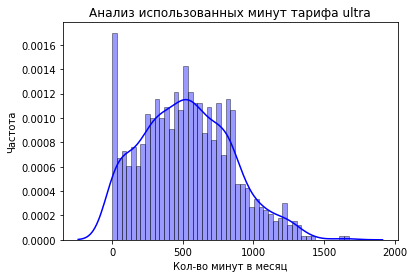

In [41]:
warnings.filterwarnings("ignore")
sns.distplot(data_ultra['minut_sum'], hist=True, 
             bins=50, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ использованных минут тарифа ultra')

plt.xlabel("Кол-во минут в месяц")
plt.ylabel("Частота");

Лимит минут тарифа Ultra состаляет 3000 минут.

Как мы видим из гистограммы большая часть пользователей тарифа используют меньше 1000 минут. Малая часть пользователей разговаривает больше 1000 минут в месяц

#### Анализ отправленных сообщений тарифа 'ultra'

In [42]:
variance = np.var(data_ultra['message_sum'], ddof = 1)
print("Дисперсия - ", variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_ultra['message_sum'].mean())

Дисперсия -  2285.2661425446736
Отклонение -  47.804457350174715
Среднее -  49.36345177664975


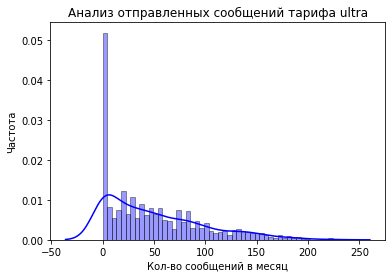

In [43]:
sns.distplot(data_ultra['message_sum'], hist=True, 
             bins=50, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ отправленных сообщений тарифа ultra')

plt.xlabel("Кол-во сообщений в месяц")
plt.ylabel("Частота");

Лимит сообщений тарифа Ultra состаляет 1000 сообщений

Как мы видим из гистограммы пользователей мало интересуют сообщения. В нынешних реалиях пользователи зачастую используют соцсети для общения. На графике мы видим как будто бы выброс. Это объясняется тем, что 25% пользователей отправляют не больше 6 сообщений Распределение скошено влево

#### Анализ использованного интернет трафика тарифа 'ultra'

In [44]:
variance = np.var(data_ultra['gb_sum'], ddof = 1)
print("Дисперсия - ", variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_ultra['gb_sum'].mean())

Дисперсия -  97.09168626965459
Отклонение -  9.853511367510293
Среднее -  19.494416243654822


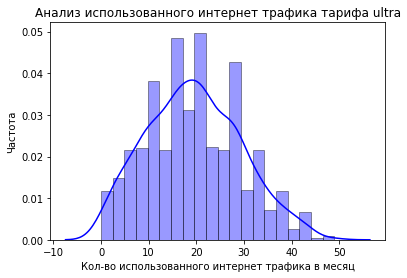

In [45]:
sns.distplot(data_ultra['gb_sum'], hist=True, 
             bins=20, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ использованного интернет трафика тарифа ultra')

plt.xlabel("Кол-во использованного интернет трафика в месяц")
plt.ylabel("Частота");

Лимит интернета тарифа Ultra состаляет 30 гигабайт

Как мы видим из графика большая часть пользователей укладывается в лимит, но все же есть пользователи, которым не хватает 30 Гигабайт. Распределение нормальное. 

### Анализ тарифа 'smart'

Также как и с тарифом ultra, извлечем данные по тарифу smart из подготовленной для анализа таблицы 

In [46]:
data_smart = data.query('tariff == "smart"')
data_smart.describe()

,user_id,month,minut_sum,gb_sum,message_sum,total_price
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,16.328847,33.384029,1289.973531
std,146.119496,2.920316,190.313730,5.747061,28.227876,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,13.000000,10.000000,550.000000
50%,1239.000000,9.000000,422.000000,17.000000,28.000000,1023.000000
75%,1376.000000,11.000000,545.000000,20.000000,51.000000,1750.000000
max,1499.000000,12.000000,1435.000000,38.000000,143.000000,6770.000000


Расчитаем в данном тарифе превышение лимита по интернету

In [47]:
display((data_smart['gb_sum'] > 15).sum())

1304

Всего тарифом пользовались 2229 абонентов 

In [48]:
round((len(data_smart[data_smart['gb_sum']>15])/len(data_smart)*100),2)

58.5

Получается лимит превысили 58% пользователей тарифа

Исходя из наших данных мы видим, что около 25% пользователей превышают лимит по сообщениям, больше 25% пользователей превышают лимит по минутам и 58% пользователей превышают лимит по пользованию интернета. Средний же платеж по тарифу превышает абонентскую плату на почти 2.5 раза!

#### Анализ использованных минут тарифа 'smart'

In [49]:
variance = np.var(data_smart['minut_sum'], ddof = 1)
print("Дисперсия - ", variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_smart['minut_sum'].mean())

Дисперсия -  36219.31578434428
Отклонение -  190.31372988921288
Среднее -  417.9349484073576


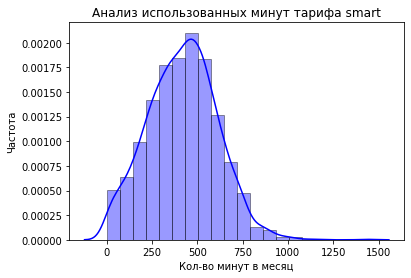

In [50]:
sns.distplot(data_smart['minut_sum'], hist=True, 
             bins=20, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ использованных минут тарифа smart')

plt.xlabel("Кол-во минут в месяц")
plt.ylabel("Частота");

Распределение нормальное. Среднее значение стремится к предоставленному лимиту. Но все же больше трети пользователей переплачивают за дополнительные минуты по тарифу

#### Анализ отправленных сообщений тарифа 'smart'

In [51]:
variance = np.var(data_smart['message_sum'], ddof = 1)
print("Дисперсия - ", variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_smart['message_sum'].mean())

Дисперсия -  796.8129584480083
Отклонение -  28.22787555676141
Среднее -  33.384028712427096


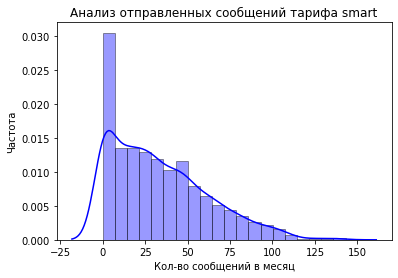

In [52]:
sns.distplot(data_smart['message_sum'], hist=True, 
             bins=20, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ отправленных сообщений тарифа smart')

plt.xlabel("Кол-во сообщений в месяц")
plt.ylabel("Частота");

Распределение скошено влево. Почти 75% пользователей укладывались в лимит

#### Анализ использованного интернет трафика тарифа 'smart'

In [53]:
variance = np.var(data_smart['gb_sum'], ddof = 1)
print("Дисперсия - ", variance)
print('Отклонение - ', np.sqrt(variance))
print('Среднее - ', data_smart['gb_sum'].mean())

Дисперсия -  33.02870517811161
Отклонение -  5.7470605685090534
Среднее -  16.328847016599372


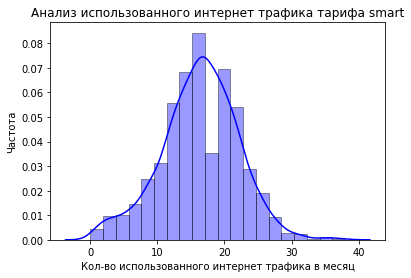

In [54]:
sns.distplot(data_smart['gb_sum'], hist=True, 
             bins=20, color = 'blue', hist_kws={'edgecolor':'black'}).set_title('Анализ использованного интернет трафика тарифа smart')

plt.xlabel("Кол-во использованного интернет трафика в месяц")
plt.ylabel("Частота");

Распредеделение нормальное. Почему то пользователи тарифа smart пользуются интернетом активнее пользователей тарифа ultra.  Чуть больше 15% только укладываются в предоставленный лимит. 

## Проверка гипотез

### Средняя выручка тарифов ultra и smart

Средняя выручка по тарифам ultra и smart равны 3844 руб. и 6247 руб.

Пусть нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;

альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [55]:
alpha = 0.05
result = st.ttest_ind(data_ultra['total_price'], data_smart['total_price'], equal_var = False)
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Вероятность одинаковой средней выручки двух тарифов оказалась слишком мала! 

Статистический вывод: отвергаем нулевую гипотезу. добавим содержательный: Средние выручки тарифов Смарт и Ультра не равны.

### Средняя выручка по пользователям из Москвы и других регионов

Пусть нулевая гипотеза - средняя выручка пользователей города Москва и других регионов равны;

альтернативная гипотеза - средняя выручка пользователей города Москва и других регионов различаются.

Для проверки данных гипотез нам нужна группировка по городам

In [56]:
data_msk = data.query('city == "Москва"')
data_msk.describe()

,user_id,month,minut_sum,gb_sum,message_sum,total_price
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,1268.872340,8.432079,469.150573,18.050736,37.877250,1546.713584
std,137.530432,2.888057,241.535044,7.645788,37.160304,752.088071
min,1001.000000,1.000000,0.000000,1.000000,0.000000,550.000000
25%,1171.000000,6.000000,304.000000,13.000000,6.500000,780.500000
50%,1291.000000,9.000000,453.000000,18.000000,29.000000,1750.000000
75%,1385.000000,11.000000,620.500000,22.000000,57.000000,1950.000000
max,1490.000000,12.000000,1321.000000,44.000000,191.000000,5321.000000


In [57]:
data_not_msk = data.query('city !="Москва"')
data_not_msk.describe()

,user_id,month,minut_sum,gb_sum,message_sum,total_price
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,1247.533615,8.290434,447.041875,17.122551,38.376104,1524.936227
std,146.011387,2.909368,241.852152,7.332184,35.913289,808.787752
min,1000.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1120.000000,6.000000,280.500000,13.000000,9.500000,750.000000
50%,1241.000000,9.000000,440.000000,17.000000,30.000000,1583.000000
75%,1377.000000,11.000000,584.000000,21.000000,57.000000,1950.000000
max,1499.000000,12.000000,1673.000000,49.000000,224.000000,6770.000000


Средняя выручка по Москве и др.городам равны 1546 руб. и 1524 руб. На первый взгляд нулевая гипотеза имеет место. Посмотрим что скажет Питон!

In [58]:
alpha = 0.05
result = st.ttest_ind(data_msk['total_price'], data_not_msk['total_price'])
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5440152911670224
не получилось отвергнуть нулевую гипотезу


p-значение слишком большое, значит нулевая гипотеза однозначно верна! Вероятность неверного расчета ничтожно мала!

# Общий вывод

Были открыты предоставленные файлы с данными. При подготовке данных к анализу были переведены данные в удобные для анализа форматы, сгруппированы данные по месяцам и добавлены соответствующие столбцы в таблицы. Далее данные с разных файлов были собраны в одну таблицу. В процессе анализа данных были разобраны два тарифа smart и ultra по каждому из составляющих.  В smart входит 50 сообщений, 500 минут, 15 ГБ, абонентская плата – 550 руб. - В ultra входит 1000 сообщений, 3000 минут, 30 ГБ, абонентская плата – 1950 руб. 

По тарифу ultra:

По полученным данным мы можем видеть, что максимальное количество минут не превышает установленный лимит. Та же самая ситуация с сообщениями. А вот предоставленных гигабайтов не достаточно почти 14% пользователей. Но доплата за дополнительный гигабайт в данном тарифе не так высока. Переплата абонентской платы за месяц пользования тарифом в среднем не большая

По тарифу smart:

Исходя из наших данных мы видим, что около 25% пользователей превышают лимит по сообщениям, больше 25% пользователей превышают лимит по минутам и 58% пользователей превышают лимит по пользованию интернета. Средний же платеж по тарифу превышает абонентскую плату на почти 2.5 раза! Превышение абонентской платы связано с высокой стоимостью дополнительных минут, сообщений и Гигабайтов относительно тарифа ultra.

Подводя итоги мы можем смело заявить, что несмотря на процент переплаты по абонентской плате в двух тарифах, больше дохода в среднем приносит тариф ultra - 2070 рублей в среднем против 1290 рублей среднего дохода от тарифа smart. Пользователи обоих тарифов превышают лимит интернет трафика. Анализ тарифов и проверка гипотез показывает, что данные расчеты не случайные, а закономерные. Средняя выручка по Москве и средняя выручка по другим городам практически не отличается.